# Bike Sharing Assignment

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


scaler = MinMaxScaler()

##  1. Data Loading and sanity checks

In [2]:
bike_dt=pd.read_csv('day.csv')

print(bike_dt.shape)
bike_dt.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike_dt.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 1.1 Fix Rows & Columns

In [5]:
# Checking footer rows & summary rows

bike_dt.tail()

# Observation: No footer and summary rows found to remove 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
# Dropping duplicate rows


bike_dt.drop_duplicates(inplace=True)
bike_dt.shape

# Observation: There are no duplicate rows in the dataset as number of rows remain same after dropping duplicate rows

(730, 16)

In [7]:
# Checking blank rows

print("Number of blank rows in dataset: ", bike_dt.isnull().all(axis=1).sum())

#Observation: No blank rows found to remove

Number of blank rows in dataset:  0


In [8]:
# Checking misaligned columns: Look for any unnamed column after last column in dataset and see if it contains any value

unnamed_column=bike_dt.columns[bike_dt.columns.str.contains('unnamed',case=False)]
unnamed_column.value_counts()

# Observation: No misaligned column found

Series([], Name: count, dtype: int64)

In [9]:
# Compute the % of null values in the columns

print((100*bike_dt.isnull().mean()).sort_values(ascending=False))

#Observation: There are no null values in any column

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [10]:
def is_valid_date(date_str):
    try:
        datetime.strptime(date_str,'%d-%m-%Y')
        return True
    except ValueError:
        return False
    
invalid_dates_dt=bike_dt[~bike_dt['dteday'].apply(is_valid_date)]    
print(invalid_dates_dt.head())


Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [11]:
bike_dt['mnth'].describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64

In [12]:
bike_dt['weekday'].describe()

count    730.000000
mean       2.997260
std        2.006161
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

In [13]:
# Droping instant column as it is index column 
bike_dt.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike_dt.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as as we have cnt column which is sum of the both 

bike_dt.drop(['casual'], axis = 1, inplace = True)
bike_dt.drop(['registered'], axis = 1, inplace = True)

In [14]:
bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# Checking datatype of each column

bike_dt.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [16]:
bike_dt.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_dt.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_dt.mnth = bike_dt.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bike_dt.weekday = bike_dt.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


## 1.2 Standardizing values

In [17]:
# Segregating columns based on numeric, categorical and target columns
num_col=['temp','atemp','hum','windspeed']
cat_col=['season','yr','mnth','holiday','weekday','workingday','weathersit']
target_col=['cnt']

In [18]:
# Setting decimal point precision for float datatype columns

for x in bike_dt[num_col]:
    if(bike_dt[x].dtype=='float64'):
        bike_dt[x]=bike_dt[x].round(2)
      
bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.11,18.18,80.58,10.75,985
1,spring,0,jan,0,sun,0,moderate,14.90,17.69,69.61,16.65,801
2,spring,0,jan,0,mon,1,good,8.05,9.47,43.73,16.64,1349
3,spring,0,jan,0,tue,1,good,8.20,10.61,59.04,10.74,1562
4,spring,0,jan,0,wed,1,good,9.31,11.46,43.70,12.52,1600


## 1.3 Removing outliners

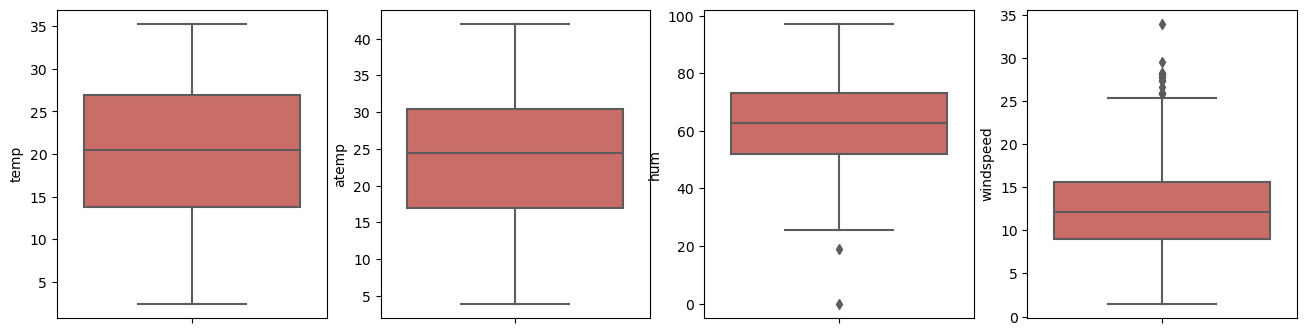

In [19]:
# Checking outliners for numerical variables

plt.figure(figsize=(16,4))

i = 1
for col in num_col:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_dt,palette='hls')
    i+=1
plt.show()

#Observation: There are no outliners

## 2. Perform analysis on variables

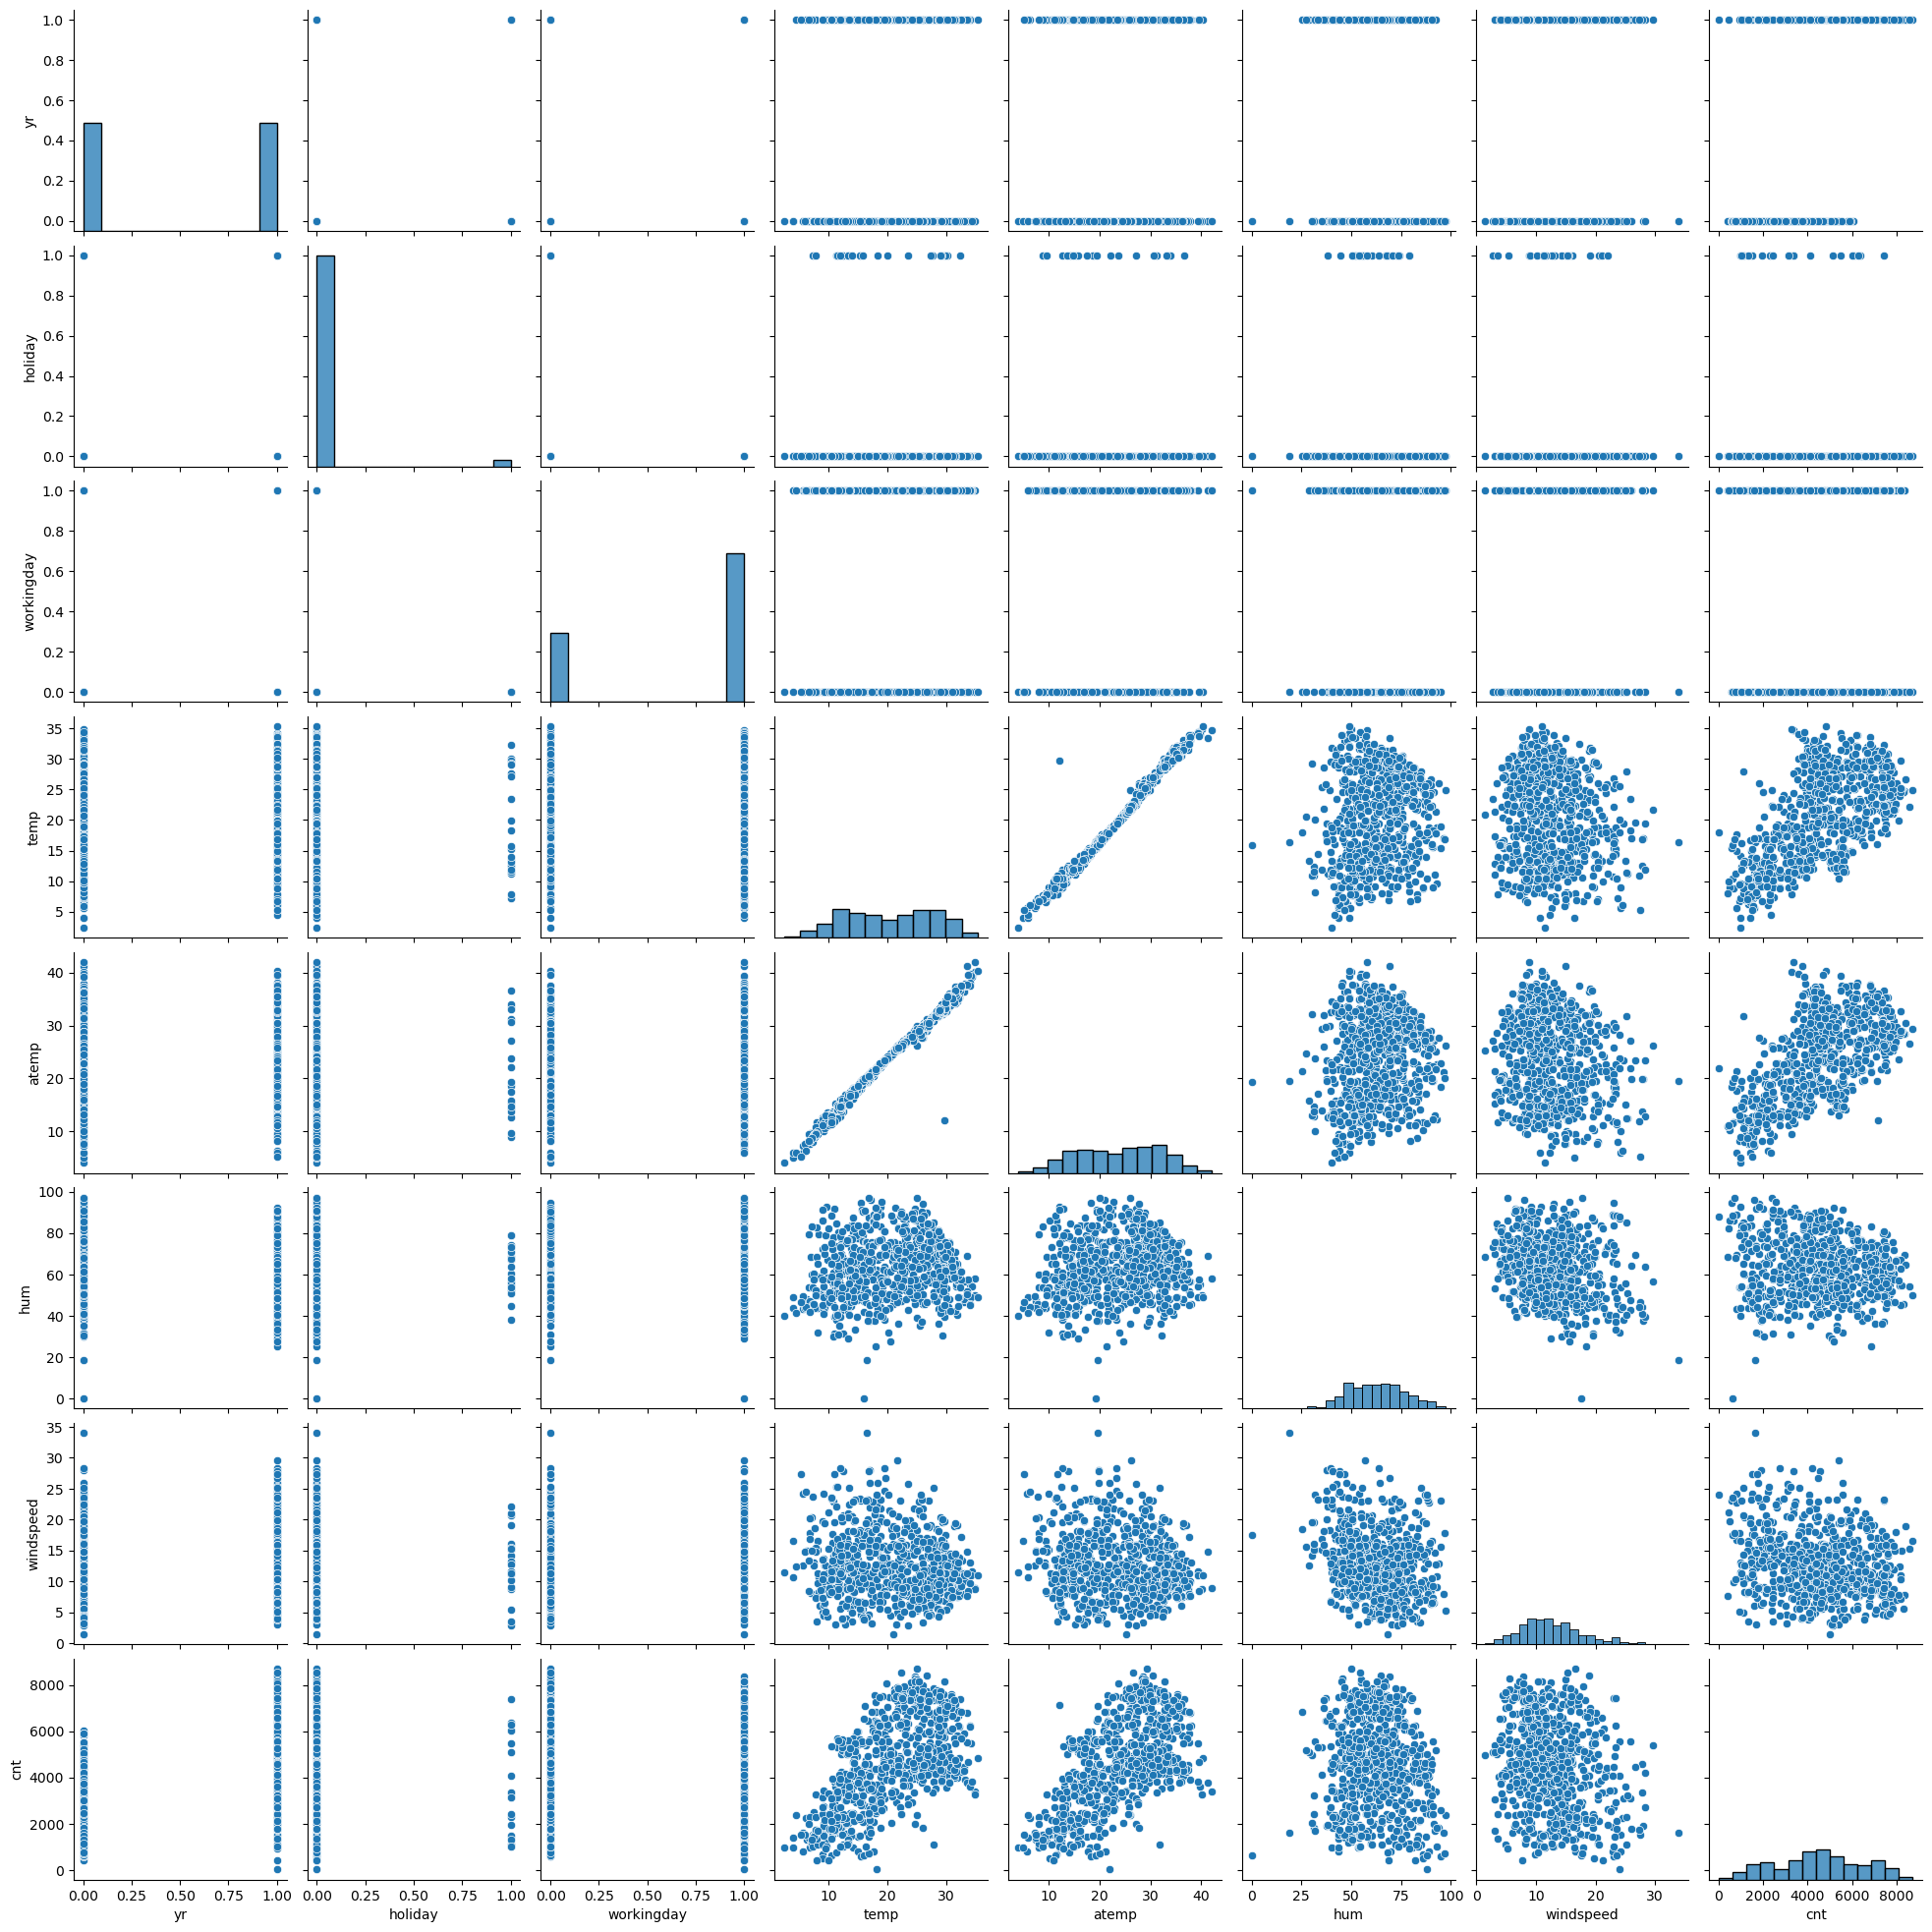

In [20]:
sns.pairplot(bike_dt)
plt.show()

### Observation: 
1. cnt shows linear relationshp with temperature and atemperature
2. temperature and atemperature shows high linear relationship

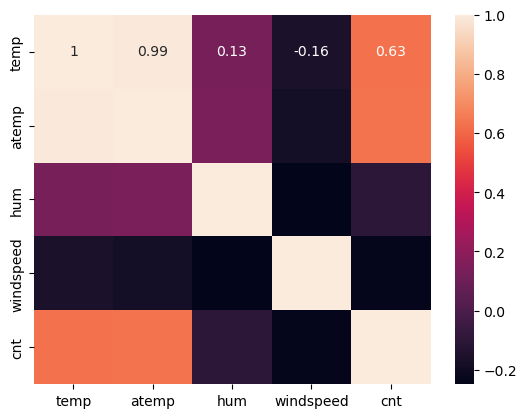

In [21]:
sns.heatmap(bike_dt[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)
plt.show()

## Observation:
Correlation between temp and atemp is very high, we can drop atemp variable

In [22]:
bike_dt.drop(['atemp'],axis=1,inplace=True)
bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.11,80.58,10.75,985
1,spring,0,jan,0,sun,0,moderate,14.90,69.61,16.65,801
2,spring,0,jan,0,mon,1,good,8.05,43.73,16.64,1349
3,spring,0,jan,0,tue,1,good,8.20,59.04,10.74,1562
4,spring,0,jan,0,wed,1,good,9.31,43.70,12.52,1600


In [23]:
num_col=['temp','hum','windspeed']



### Analyzing target variable w.r.t categorical variable

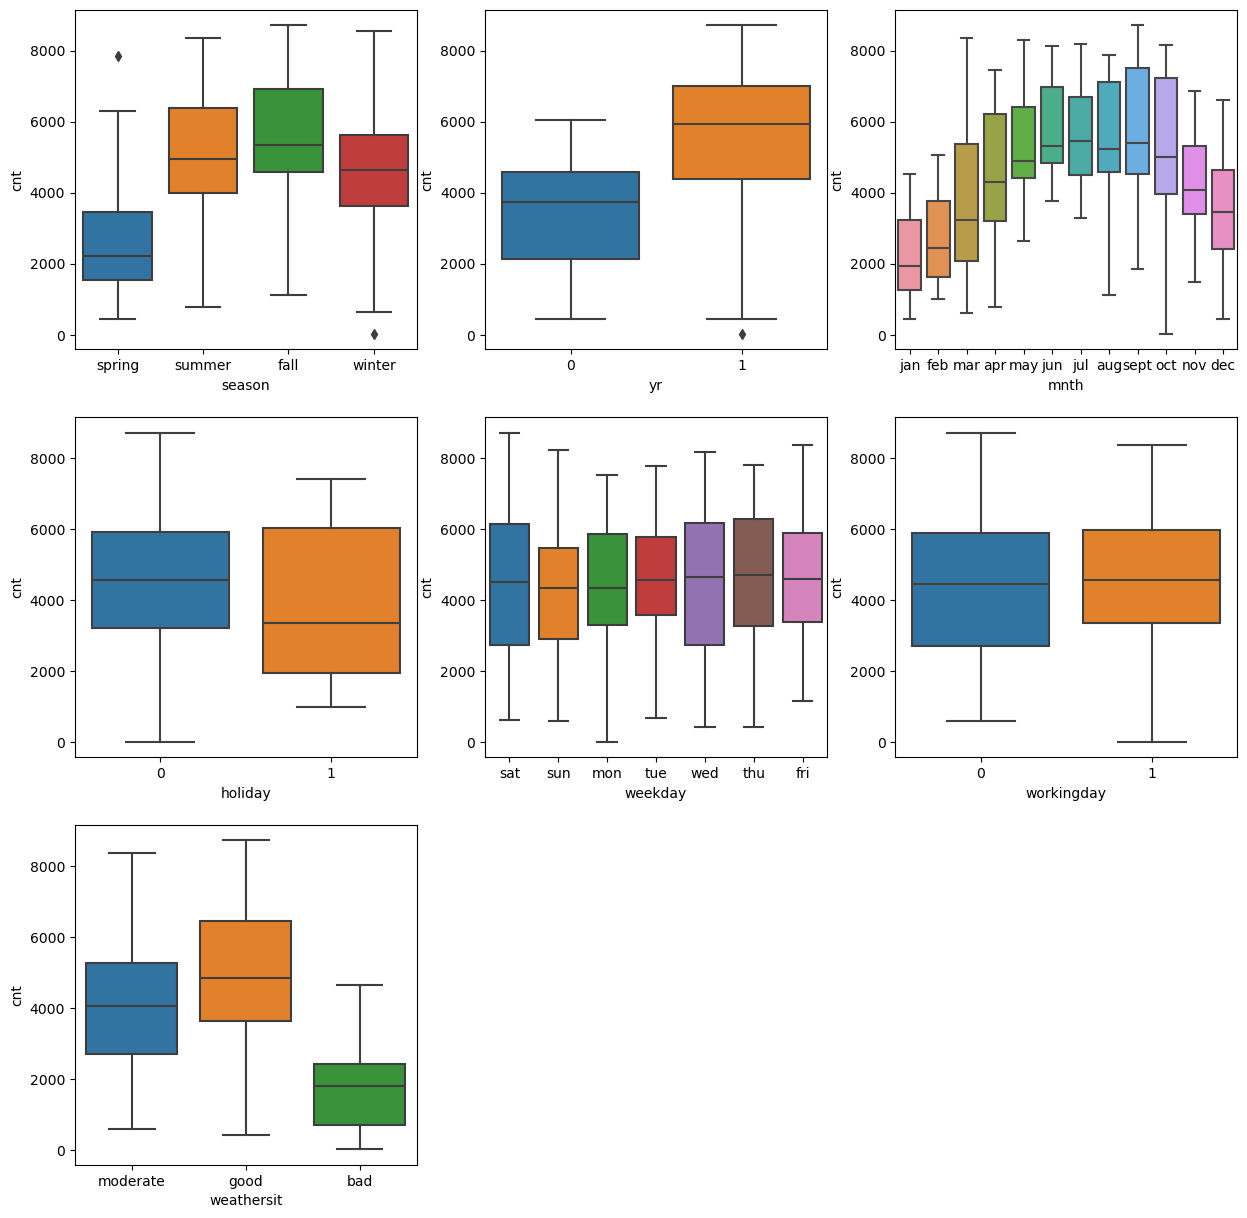

In [24]:
plt.figure(figsize=(15, 15))
for i in enumerate(cat_col):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_dt, x=i[1], y='cnt')
plt.show()

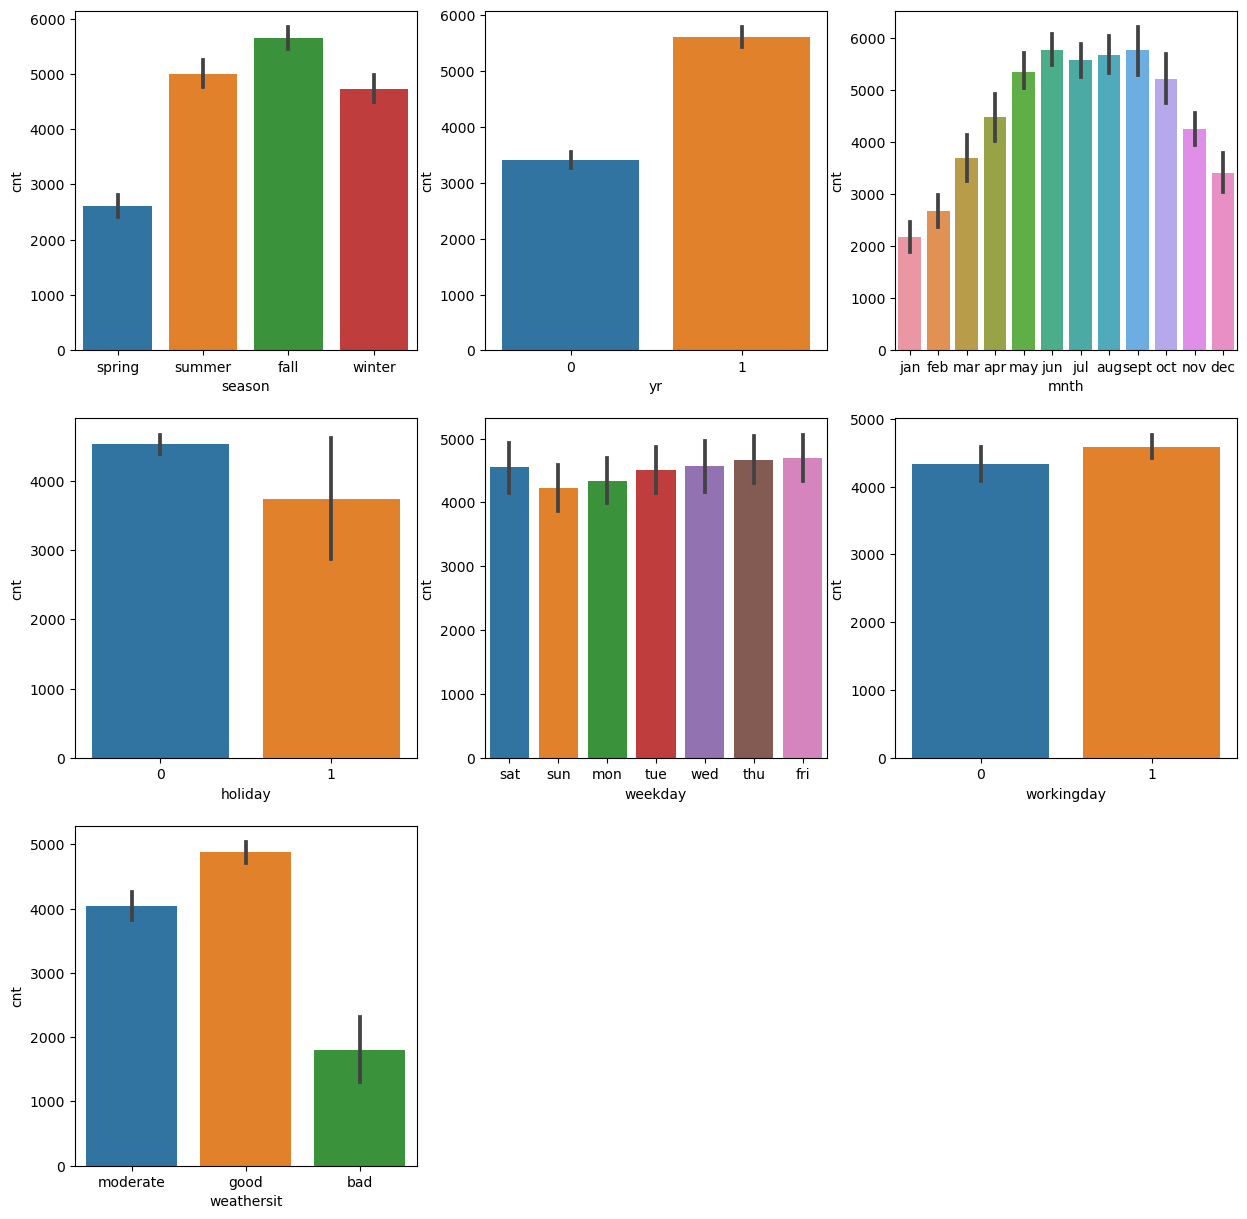

In [25]:
plt.figure(figsize=(15, 15))
for i in enumerate(cat_col):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(data=bike_dt, x=i[1], y='cnt',estimator=np.mean)
plt.show()

### Observations:
1. Distribution of rides taken varies as per season so it can be a good predictor variable
2. Demand of rental bikes has increased as year increases so year can be a good attribute for predicting demand in upcoming years.
3. Demand of rental bikes has increased from May to October month so month can be a good attribute for predicting the demand.
4. Distribiution of rental bikes varies as per weather, whether it is a holiday or not and weekday
5. No significant variation is seen across working day feature.



### Analyzing target variable w.r.t numerical variables

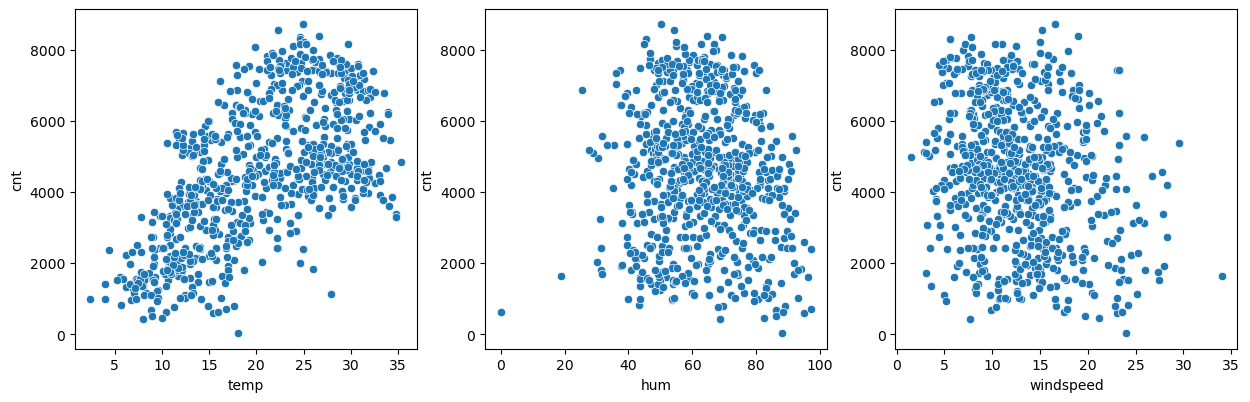

In [26]:
plt.figure(figsize=(15, 15))
for i in enumerate(num_col):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=bike_dt, x=i[1], y='cnt')
plt.show()

## Observation:
1. Temperature shows linear relationship with number of bikes rented.

In [27]:
bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.11,80.58,10.75,985
1,spring,0,jan,0,sun,0,moderate,14.90,69.61,16.65,801
2,spring,0,jan,0,mon,1,good,8.05,43.73,16.64,1349
3,spring,0,jan,0,tue,1,good,8.20,59.04,10.74,1562
4,spring,0,jan,0,wed,1,good,9.31,43.70,12.52,1600


## 3. Creating Dummy Variables

### 3.1 Create Dummy variable for season column

In [28]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status_season'
status_season=pd.get_dummies(bike_dt['season'],dtype=int)
status_season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [29]:
# drop first column 'fall'
status_season=pd.get_dummies(bike_dt['season'],dtype=int,drop_first=True)

# Adding above dataframe to original dataframe
bike_dt=pd.concat([bike_dt,status_season],axis=1)

bike_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,sat,0,moderate,14.11,80.58,10.75,985,1,0,0
1,spring,0,jan,0,sun,0,moderate,14.90,69.61,16.65,801,1,0,0
2,spring,0,jan,0,mon,1,good,8.05,43.73,16.64,1349,1,0,0
3,spring,0,jan,0,tue,1,good,8.20,59.04,10.74,1562,1,0,0
4,spring,0,jan,0,wed,1,good,9.31,43.70,12.52,1600,1,0,0


In [30]:
# drop 'season' as we have converted it into dummy variables

bike_dt.drop(['season'],axis=1,inplace=True)
bike_dt.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,sat,0,moderate,14.11,80.58,10.75,985,1,0,0
1,0,jan,0,sun,0,moderate,14.90,69.61,16.65,801,1,0,0
2,0,jan,0,mon,1,good,8.05,43.73,16.64,1349,1,0,0
3,0,jan,0,tue,1,good,8.20,59.04,10.74,1562,1,0,0
4,0,jan,0,wed,1,good,9.31,43.70,12.52,1600,1,0,0


### 3.2 Create Dummy variable for Month column

In [31]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'status_mnth'
status_mnth=pd.get_dummies(bike_dt['mnth'],dtype=int)
status_mnth.head()



,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [32]:
# drop first column 
status_mnth=pd.get_dummies(bike_dt['mnth'],dtype=int,drop_first=True)
status_mnth.head()


,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [33]:
# Adding above dataframe to original dataframe
bike_dt=pd.concat([bike_dt,status_mnth],axis=1)

# drop 'mnth' as we have converted it into dummy variables

bike_dt.drop(['mnth'],axis=1,inplace=True)
bike_dt.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,sat,0,moderate,14.11,80.58,10.75,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sun,0,moderate,14.90,69.61,16.65,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,mon,1,good,8.05,43.73,16.64,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tue,1,good,8.20,59.04,10.74,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wed,1,good,9.31,43.70,12.52,1600,1,...,0,0,1,0,0,0,0,0,0,0


### 3.3 Create Dummy variable for weekday column

In [34]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'status_week'
status_week=pd.get_dummies(bike_dt['weekday'],dtype=int,drop_first=True)
# Adding above dataframe to original dataframe
bike_dt=pd.concat([bike_dt,status_week],axis=1)

# drop 'weekday' as we have converted it into dummy variables

bike_dt.drop(['weekday'],axis=1,inplace=True)
bike_dt.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sept,mon,sat,sun,thu,tue,wed
0,0,0,0,moderate,14.11,80.58,10.75,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,moderate,14.90,69.61,16.65,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,good,8.05,43.73,16.64,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,good,8.20,59.04,10.74,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,good,9.31,43.70,12.52,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


### 3.4 Create Dummy variable for weathersit column


In [35]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status_weather'
status_weather=pd.get_dummies(bike_dt['weathersit'],dtype=int,drop_first=True)
# Adding above dataframe to original dataframe
bike_dt=pd.concat([bike_dt,status_weather],axis=1)

# drop 'weathersit' as we have converted it into dummy variables

bike_dt.drop(['weathersit'],axis=1,inplace=True)
bike_dt.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
0,0,0,0,14.11,80.58,10.75,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.90,69.61,16.65,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.05,43.73,16.64,1349,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.20,59.04,10.74,1562,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.31,43.70,12.52,1600,1,0,0,...,0,0,0,0,0,0,0,1,1,0


#  4. Data Splitting
#### Here, we will split the data into 2 parts
- 1. Train Data (On which model will be build and is almost 70% of total data)
- 2. Test Data (On which build model will be tested and is almost 30% of total data)


In [36]:
bike_train,bike_test=train_test_split(bike_dt,train_size=0.7,random_state=100)
print('Shape of train data:',bike_train.shape)
print('Shape of test data:',bike_test.shape)

Shape of train data: (510, 29)
Shape of test data: (220, 29)


## 5. Rescaling the Features 

In [37]:
# Rescaling the numeric columns using min-max scaling
num_col_scale=['temp','hum','windspeed','cnt']
bike_train[num_col_scale]=scaler.fit_transform(bike_train[num_col_scale])
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
576,1,0,1,0.815254,0.725680,0.264678,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442419,0.640148,0.255374,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245214,0.498042,0.663138,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395624,0.504534,0.188643,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345792,0.751855,0.381136,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### 6. Dividing into X and Y sets for the model building

In [38]:
y_train=bike_train.pop('cnt')
x_train=bike_train

##  7. Building a linear model 


We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn) then do manual analysis

In [39]:
estimator=LinearRegression()


In [40]:
# Selecting all the features for 1st model
selector=RFE(estimator,n_features_to_select=28)

In [41]:
selector=selector.fit(x_train,y_train)


In [42]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [43]:
# Listing columns selected by RFE 
col= bike_train.columns[selector.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'good', 'moderate'],
      dtype='object')

In [44]:
# Creating x_train_rfe dataframe using RFE selected variables
x_train_rfe=x_train[col]
x_train_rfe.head()


,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,aug,...,oct,sept,mon,sat,sun,thu,tue,wed,good,moderate
576,1,0,1,0.815254,0.725680,0.264678,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442419,0.640148,0.255374,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245214,0.498042,0.663138,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395624,0.504534,0.188643,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345792,0.751855,0.381136,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
x_train_rfe=sm.add_constant(x_train_rfe)
model=sm.OLS(y_train,x_train_rfe)


In [46]:
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.05e-181
Time:                        11:41:38   Log-Likelihood:                 527.01
No. Observations:                 510   AIC:                            -998.0
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0385      0.043      0.891      0.3

In [47]:
vif_data=pd.DataFrame()
vif_data['features']=x_train_rfe.columns
vif_data['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,features,VIF
2,holiday,inf
3,workingday,inf
23,sun,inf
22,sat,inf
7,spring,10.75
27,good,10.60
9,winter,9.44
28,moderate,9.19
8,summer,8.27
4,temp,7.08


In [48]:
# Model 2: Remove holiday column as it has high VIF and high P value

x_train_new = x_train_rfe.drop(["holiday"], axis = 1)

In [49]:
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.05e-181
Time:                        11:41:39   Log-Likelihood:                 527.01
No. Observations:                 510   AIC:                            -998.0
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.061     -0.044      0.9

In [50]:
vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
vif_data

,features,VIF
0,const,241.62
6,spring,10.75
26,good,10.60
2,workingday,10.10
8,winter,9.44
27,moderate,9.19
7,summer,8.27
21,sat,7.74
22,sun,7.30
3,temp,7.08


In [51]:
# Model 3: Remove spring column as it has high VIF and high P value

x_train_new = x_train_new.drop(["spring"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.81e-182
Time:                        11:41:39   Log-Likelihood:                 525.83
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     483   BIC:                            -883.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0283      0.059     -0.484      0.6

In [52]:
# Model 4: Remove sunday column as it has high VIF and high P value

x_train_new = x_train_new.drop(["sun"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.43e-182
Time:                        11:41:39   Log-Likelihood:                 525.24
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     484   BIC:                            -888.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.052      0.013      0.9

In [53]:
# Model 5: Remove nov column as it has high VIF and high P value

x_train_new = x_train_new.drop(["nov"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     115.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.60e-183
Time:                        11:41:39   Log-Likelihood:                 524.52
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     485   BIC:                            -893.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0204      0.048     -0.421      0.6

In [54]:
# Model 6: Remove dec column as it has  high P value

x_train_new = x_train_new.drop(["dec"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.75e-184
Time:                        11:41:40   Log-Likelihood:                 524.02
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     486   BIC:                            -898.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0293      0.048     -0.616      0.5

In [55]:
# Model 7: Remove jul column as it has  high P value

x_train_new = x_train_new.drop(["jul"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.51e-185
Time:                        11:41:40   Log-Likelihood:                 523.96
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     487   BIC:                            -904.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0284      0.047     -0.598      0.5

In [56]:
# Model 8: Remove feb column as it has  high P value

x_train_new = x_train_new.drop(["feb"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.93e-186
Time:                        11:41:40   Log-Likelihood:                 523.44
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     488   BIC:                            -909.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0431      0.045     -0.954      0.3

In [57]:
# Model 9: Remove jun column as it has  high P value

x_train_new = x_train_new.drop(["jun"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          6.46e-187
Time:                        11:41:40   Log-Likelihood:                 522.97
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     489   BIC:                            -915.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0442      0.045     -0.980      0.3

In [58]:
# Model 10: Remove mar column as it has  high P value

x_train_new = x_train_new.drop(["mar"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.71e-188
Time:                        11:41:41   Log-Likelihood:                 522.44
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     490   BIC:                            -920.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0385      0.045     -0.860      0.3

In [59]:
# Model 11: Remove thu column as it has  high P value

x_train_new = x_train_new.drop(["thu"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     154.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.06e-188
Time:                        11:41:41   Log-Likelihood:                 521.99
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     491   BIC:                            -925.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0405      0.045     -0.905      0.3

In [60]:
# Model 12: Remove wed column as it has  high P value

x_train_new = x_train_new.drop(["wed"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     163.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          8.47e-190
Time:                        11:41:41   Log-Likelihood:                 521.96
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     492   BIC:                            -931.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0407      0.045     -0.910      0.3

In [61]:
# Model 13: Remove may column as it has  high P value

x_train_new = x_train_new.drop(["may"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.14e-190
Time:                        11:41:41   Log-Likelihood:                 521.34
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0472      0.044     -1.066      0.2

In [62]:
# Model 14: Remove tue column as it has  high P value

x_train_new = x_train_new.drop(["tue"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.69e-191
Time:                        11:41:41   Log-Likelihood:                 520.60
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -941.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0449      0.044     -1.014      0.3

In [63]:
# Model 15: Remove mon column as it has  high P value

x_train_new = x_train_new.drop(["mon"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.2
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.37e-192
Time:                        11:41:41   Log-Likelihood:                 519.24
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -945.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0447      0.044     -1.008      0.3

In [64]:
# Model 16: Remove jan column as it has  high P value

x_train_new = x_train_new.drop(["jan"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.00e-192
Time:                        11:41:41   Log-Likelihood:                 516.31
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0612      0.044     -1.391      0.1

In [65]:
# Model 17: Remove good column as it has  high P value

x_train_new = x_train_new.drop(["good"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     187.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          1.64e-175
Time:                        11:41:41   Log-Likelihood:                 474.31
No. Observations:                 510   AIC:                            -922.6
Df Residuals:                     497   BIC:                            -867.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2647      0.030      8.971      0.0

In [66]:
# Model 18: Remove oct column as it has  high P value

x_train_new = x_train_new.drop(["oct"], axis = 1)
x_train_rfe=sm.add_constant(x_train_new)
model=sm.OLS(y_train,x_train_rfe)
result=model.fit()
print(result.summary())

vif_data=pd.DataFrame()
vif_data['features']=x_train_new.columns
vif_data['VIF']=[variance_inflation_factor(x_train_new.values,i) for i in range(x_train_new.shape[1])]
vif_data['VIF']=round(vif_data['VIF'],2)
vif_data = vif_data.sort_values(by = "VIF", ascending = False)
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     203.5
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.71e-176
Time:                        11:41:41   Log-Likelihood:                 473.40
No. Observations:                 510   AIC:                            -922.8
Df Residuals:                     498   BIC:                            -872.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2591      0.029      8.865      0.0

In [67]:
x_train_new = x_train_new.drop(["const"], axis = 1)


# 8. Proof for Linear Regression Assumptions

## 8.1 Residual Analysis of the train data

Text(0.5, 0, 'Errors')

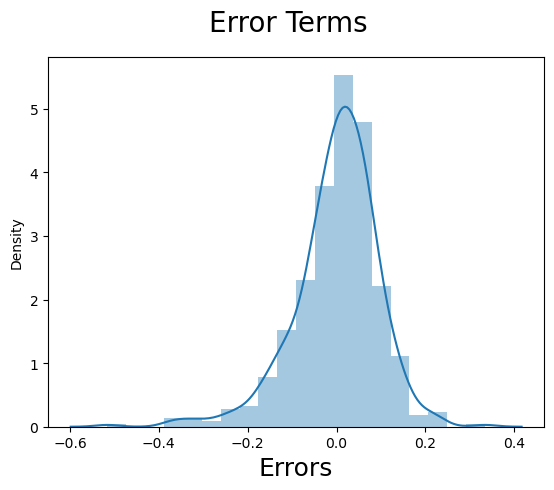

In [68]:
y_train_cnt = result.predict(x_train_rfe)
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

##### Observation: From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.

## 8.2 Homoscedasticity

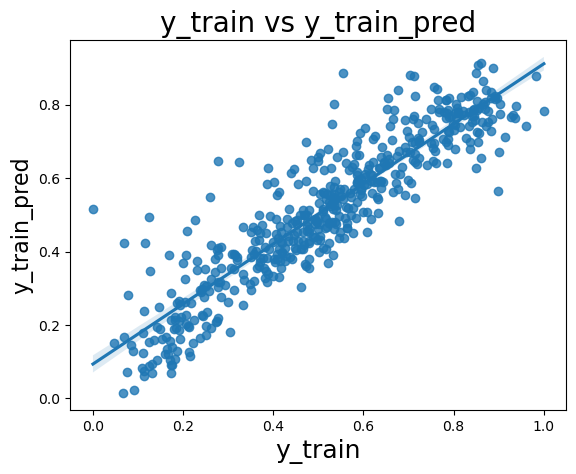

In [69]:
fig=plt.figure()
sns.regplot(x=y_train,y=y_train_cnt)
plt.title('y_train vs y_train_pred', fontsize=20)  
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)    
plt.show()

#### Observation: From the above graph, we can say that residuals are equal distributed across predicted value.

# 9. Making Predictions

#### Applying the scaling on the test sets

In [70]:
num_col_scale=['temp','hum','windspeed','cnt']
bike_test[num_col_scale]=scaler.transform(bike_test[num_col_scale])

#### Dividing X and Y on test dataset

In [71]:
y_test= bike_test.pop('cnt')
x_test=bike_test

In [72]:
x_test_new=x_test[x_train_new.columns]


#### Predicting y_pred

In [73]:
x_test_new = sm.add_constant(x_test_new)
# Making predictions
y_pred = result.predict(x_test_new)

## 10. Model Evaluation on test dataset

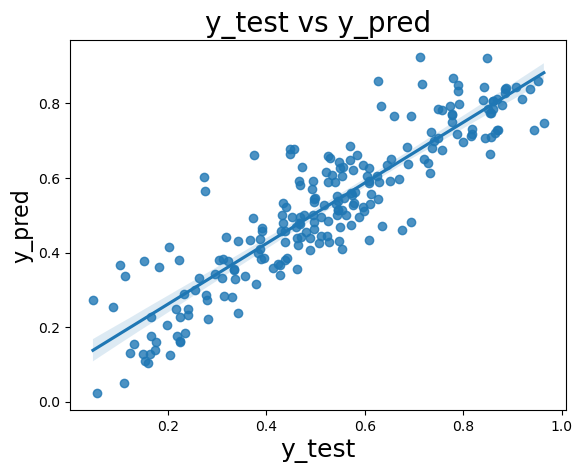

In [74]:
fig=plt.figure()
sns.regplot(x=y_test,y=y_pred)
plt.title('y_test vs y_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    
plt.show()

#### Observation: Above Scatter Plot Shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points

# 11. R2 Value

In [75]:
r2_score(y_test, y_pred)

0.8053649793910731

# 12. Final Observations:
## Predictor variables 

1. workingday
2. weekday 
3. hum  
4. temp 
5. month  
6. weathersit    
7. windspeed  
8. yr 

----------
1. Humidity coefficient comes out to be -0.29 indicating that a unit increase in humidity decreases the bike hire numbers by 0.29 units.
2. Coefficient of temperature comes out to be 0.56 indicating that a unit increase in temp variable increases the bike hire numbers by 0.56 units. 
3. Bike hire numbers seems to be more in the month of august and september.
4. Coefficient of year comes out to be 0.23 which means a unit increase in year increases the bike hire numbers by 0.23 nits means people might prefer to rent a bike post covid instead of travelling via public transport.